In [9]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models, layers


In [ ]:

(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
print("Formato dos dados:", x_train.shape, y_train.shape)


Formato dos dados: (60000, 28, 28) (60000,)


In [ ]:

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [ ]:

def map_class(c):
    # Frio: suéter(2), casaco(4), camisa(6), bota(9)
    # Calor: camiseta(0), calça(1), vestido(3), sandália(5), tênis(7), bolsa(8)
    if c in [2, 4, 6, 9]:
        return 0
    else:
        return 1

y_train_bin = np.array([map_class(c) for c in y_train])
y_test_bin = np.array([map_class(c) for c in y_test])

print("Exemplo de rótulos originais:", y_train[:10])
print("Exemplo de rótulos binários:", y_train_bin[:10])


Exemplo de rótulos originais: [9 0 0 3 0 2 7 2 5 5]
Exemplo de rótulos binários: [0 1 1 1 1 0 1 0 1 1]


In [ ]:

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,873 (874.50 KB)

 Trainable params: 223,873 (874.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:

history = model.fit(x_train, y_train_bin, 
                    epochs=10, 
                    batch_size=64, 
                    validation_split=0.2)


Epoch 1/10


2025-08-22 18:15:32.866918: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8931 - loss: 0.2495

2025-08-22 18:15:57.264839: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.8931 - loss: 0.2494 - val_accuracy: 0.9384 - val_loss: 0.1443
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9377 - loss: 0.1465 - val_accuracy: 0.9417 - val_loss: 0.1410
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 34ms/step - accuracy: 0.9458 - loss: 0.1276 - val_accuracy: 0.9475 - val_loss: 0.1220
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.9504 - loss: 0.1179 - val_accuracy: 0.9442 - val_loss: 0.1304
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9545 - loss: 0.1070 - val_accuracy: 0.9525 - val_loss: 0.1128
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9600 - loss: 0.0974 - val_accuracy: 0.9513 - val_loss: 0.1216
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.9629 - loss: 0.0924 - val_accuracy: 0.9457 - val_loss: 0.1263
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9647 - loss: 0.0863 - val_accurac

In [15]:

test_loss, test_acc = model.evaluate(x_test, y_test_bin)
print(f"\nAcurácia no teste: {test_acc:.4f}")


 31/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9493 - loss: 0.1195

2025-08-22 18:20:03.025270: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9497 - loss: 0.1214

Acurácia no teste: 0.9483


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


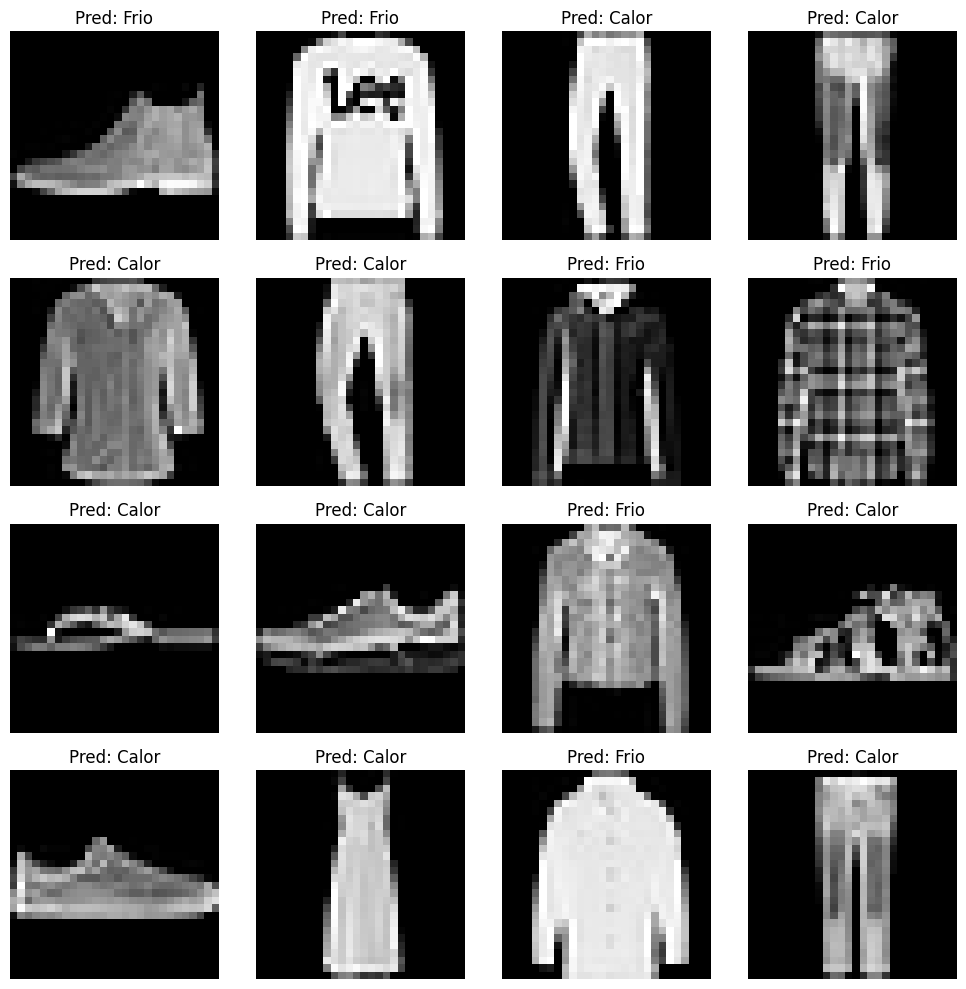

In [16]:

predictions = (model.predict(x_test[:16]) > 0.5).astype("int32")

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title("Pred: " + ("Calor" if predictions[i]==1 else "Frio"))
    plt.axis("off")
plt.tight_layout()
plt.show()
